## 1 - Packages ##

In [14]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

1.13.1


In [15]:
# pip install sklearn

In [16]:
# import sys
# for path in sys.path:
#     print(path)
# import testCases_v2 as m
# print(m.__file__)

## 2 - Dataset ##

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    return X.T, Y.T

def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

In [45]:
X, Y = load_planar_dataset()
print(X.shape)
print(Y.shape)

(2, 400)
(1, 400)


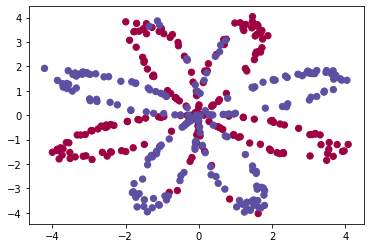

In [46]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y[0, :], s=40, cmap=plt.cm.Spectral);

In [80]:
from tensorflow.keras import layers

model = tf.keras.Sequential()
model.add(layers.Dense(10, input_dim=2, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.train.GradientDescentOptimizer(0.009),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [81]:
model.fit(X.T, Y.T, epochs=10000, batch_size=100)

Epoch 1/10000
400/400 [==============================] - 0s 339us/sample - loss: 0.7263 - acc: 0.6400
Epoch 2/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.7223 - acc: 0.6650
Epoch 3/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.7188 - acc: 0.6700
Epoch 4/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.7152 - acc: 0.6700
Epoch 5/10000
400/400 [==============================] - 0s 23us/sample - loss: 0.7120 - acc: 0.6600
Epoch 6/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.7090 - acc: 0.6575
Epoch 7/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.7063 - acc: 0.6450
Epoch 8/10000
400/400 [==============================] - 0s 26us/sample - loss: 0.7037 - acc: 0.6450
Epoch 9/10000
400/400 [==============================] - 0s 28us/sample - loss: 0.7012 - acc: 0.6350
Epoch 10/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.6988 - 

400/400 [==============================] - 0s 14us/sample - loss: 0.6411 - acc: 0.6875
Epoch 82/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.6408 - acc: 0.6875
Epoch 83/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.6405 - acc: 0.6850
Epoch 84/10000
400/400 [==============================] - 0s 23us/sample - loss: 0.6401 - acc: 0.6850
Epoch 85/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.6398 - acc: 0.6850
Epoch 86/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.6394 - acc: 0.6850
Epoch 87/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.6391 - acc: 0.6850
Epoch 88/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.6387 - acc: 0.6850
Epoch 89/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.6384 - acc: 0.6850
Epoch 90/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.6381 - acc: 0.

400/400 [==============================] - 0s 15us/sample - loss: 0.6079 - acc: 0.7300
Epoch 161/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.6075 - acc: 0.7325
Epoch 162/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.6071 - acc: 0.7325
Epoch 163/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.6065 - acc: 0.7325
Epoch 164/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.6061 - acc: 0.7300
Epoch 165/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.6056 - acc: 0.7325
Epoch 166/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.6052 - acc: 0.7350
Epoch 167/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.6047 - acc: 0.7325
Epoch 168/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.6043 - acc: 0.7350
Epoch 169/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.6038 

400/400 [==============================] - 0s 14us/sample - loss: 0.5753 - acc: 0.8050
Epoch 240/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.5748 - acc: 0.8075
Epoch 241/10000
400/400 [==============================] - 0s 13us/sample - loss: 0.5744 - acc: 0.8100
Epoch 242/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.5740 - acc: 0.8100
Epoch 243/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.5736 - acc: 0.8075
Epoch 244/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.5731 - acc: 0.8150
Epoch 245/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.5728 - acc: 0.8125
Epoch 246/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.5724 - acc: 0.8125
Epoch 247/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.5719 - acc: 0.8125
Epoch 248/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.5716 

400/400 [==============================] - 0s 19us/sample - loss: 0.5427 - acc: 0.8525
Epoch 319/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.5425 - acc: 0.8525
Epoch 320/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.5419 - acc: 0.8525
Epoch 321/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.5415 - acc: 0.8525
Epoch 322/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.5412 - acc: 0.8525
Epoch 323/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.5407 - acc: 0.8525
Epoch 324/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.5402 - acc: 0.8525
Epoch 325/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.5398 - acc: 0.8525
Epoch 326/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.5394 - acc: 0.8525
Epoch 327/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.5391 

400/400 [==============================] - 0s 12us/sample - loss: 0.5107 - acc: 0.8675
Epoch 398/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.5103 - acc: 0.8675
Epoch 399/10000
400/400 [==============================] - 0s 13us/sample - loss: 0.5099 - acc: 0.8675
Epoch 400/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.5095 - acc: 0.8650
Epoch 401/10000
400/400 [==============================] - 0s 12us/sample - loss: 0.5091 - acc: 0.8650
Epoch 402/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.5087 - acc: 0.8700
Epoch 403/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.5082 - acc: 0.8700
Epoch 404/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.5079 - acc: 0.8675
Epoch 405/10000
400/400 [==============================] - 0s 13us/sample - loss: 0.5076 - acc: 0.8675
Epoch 406/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.5071 

400/400 [==============================] - 0s 15us/sample - loss: 0.4813 - acc: 0.8700
Epoch 477/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.4810 - acc: 0.8725
Epoch 478/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.4805 - acc: 0.8700
Epoch 479/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.4801 - acc: 0.8700
Epoch 480/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.4800 - acc: 0.8750
Epoch 481/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.4795 - acc: 0.8725
Epoch 482/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.4792 - acc: 0.8700
Epoch 483/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.4789 - acc: 0.8725
Epoch 484/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.4784 - acc: 0.8725
Epoch 485/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.4782 

400/400 [==============================] - 0s 19us/sample - loss: 0.4562 - acc: 0.8775
Epoch 556/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.4561 - acc: 0.8775
Epoch 557/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.4558 - acc: 0.8750
Epoch 558/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.4554 - acc: 0.8775
Epoch 559/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.4550 - acc: 0.8775
Epoch 560/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.4548 - acc: 0.8750
Epoch 561/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.4545 - acc: 0.8750
Epoch 562/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.4542 - acc: 0.8775
Epoch 563/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.4538 - acc: 0.8775
Epoch 564/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.4537 

400/400 [==============================] - 0s 17us/sample - loss: 0.4363 - acc: 0.8750
Epoch 635/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.4361 - acc: 0.8725
Epoch 636/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.4356 - acc: 0.8725
Epoch 637/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.4354 - acc: 0.8750
Epoch 638/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.4354 - acc: 0.8725
Epoch 639/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.4349 - acc: 0.8725
Epoch 640/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.4348 - acc: 0.8725
Epoch 641/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.4346 - acc: 0.8725
Epoch 642/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.4342 - acc: 0.8725
Epoch 643/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.4343 

400/400 [==============================] - 0s 18us/sample - loss: 0.4201 - acc: 0.8700
Epoch 714/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.4196 - acc: 0.8700
Epoch 715/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.4197 - acc: 0.8700
Epoch 716/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.4193 - acc: 0.8700
Epoch 717/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.4194 - acc: 0.8700
Epoch 718/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.4191 - acc: 0.8700
Epoch 719/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.4188 - acc: 0.8700
Epoch 720/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.4186 - acc: 0.8700
Epoch 721/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.4187 - acc: 0.8700
Epoch 722/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.4184 

400/400 [==============================] - 0s 17us/sample - loss: 0.4065 - acc: 0.8700
Epoch 793/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.4065 - acc: 0.8725
Epoch 794/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.4061 - acc: 0.8700
Epoch 795/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.4061 - acc: 0.8700
Epoch 796/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.4059 - acc: 0.8700
Epoch 797/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.4058 - acc: 0.8725
Epoch 798/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.4054 - acc: 0.8700
Epoch 799/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.4056 - acc: 0.8700
Epoch 800/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.4050 - acc: 0.8700
Epoch 801/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.4050 

400/400 [==============================] - 0s 21us/sample - loss: 0.3931 - acc: 0.8700
Epoch 872/10000
400/400 [==============================] - 0s 13us/sample - loss: 0.3929 - acc: 0.8700
Epoch 873/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.3929 - acc: 0.8700
Epoch 874/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3925 - acc: 0.8700
Epoch 875/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.3927 - acc: 0.8700
Epoch 876/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3923 - acc: 0.8700
Epoch 877/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.3920 - acc: 0.8725
Epoch 878/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3921 - acc: 0.8750
Epoch 879/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3917 - acc: 0.8725
Epoch 880/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.3917 

400/400 [==============================] - 0s 15us/sample - loss: 0.3792 - acc: 0.8750
Epoch 951/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3790 - acc: 0.8775
Epoch 952/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3790 - acc: 0.8775
Epoch 953/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.3787 - acc: 0.8725
Epoch 954/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.3789 - acc: 0.8775
Epoch 955/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3785 - acc: 0.8750
Epoch 956/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.3781 - acc: 0.8775
Epoch 957/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.3783 - acc: 0.8775
Epoch 958/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3782 - acc: 0.8775
Epoch 959/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.3779 

400/400 [==============================] - 0s 16us/sample - loss: 0.3682 - acc: 0.8775
Epoch 1030/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.3678 - acc: 0.8775
Epoch 1031/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3679 - acc: 0.8775
Epoch 1032/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.3675 - acc: 0.8775
Epoch 1033/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3676 - acc: 0.8775
Epoch 1034/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.3677 - acc: 0.8775
Epoch 1035/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.3673 - acc: 0.8775
Epoch 1036/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.3669 - acc: 0.8775
Epoch 1037/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.3670 - acc: 0.8775
Epoch 1038/10000
400/400 [==============================] - 0s 19us/sample - loss

Epoch 1108/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.3591 - acc: 0.8800
Epoch 1109/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.3591 - acc: 0.8775
Epoch 1110/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.3595 - acc: 0.8800
Epoch 1111/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.3590 - acc: 0.8775
Epoch 1112/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3588 - acc: 0.8800
Epoch 1113/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3588 - acc: 0.8775
Epoch 1114/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.3587 - acc: 0.8775
Epoch 1115/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.3588 - acc: 0.8800
Epoch 1116/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.3581 - acc: 0.8800
Epoch 1117/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 14us/sample - loss: 0.3515 - acc: 0.8850
Epoch 1187/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.3516 - acc: 0.8825
Epoch 1188/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3517 - acc: 0.8800
Epoch 1189/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.3519 - acc: 0.8825
Epoch 1190/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.3518 - acc: 0.8850
Epoch 1191/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.3510 - acc: 0.8825
Epoch 1192/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.3514 - acc: 0.8850
Epoch 1193/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.3513 - acc: 0.8825
Epoch 1194/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.3510 - acc: 0.8825
Epoch 1195/10000
400/400 [==============================] - 0s 14us/sample - loss

Epoch 1265/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3453 - acc: 0.8875
Epoch 1266/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3454 - acc: 0.8825
Epoch 1267/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3451 - acc: 0.8825
Epoch 1268/10000
400/400 [==============================] - 0s 13us/sample - loss: 0.3449 - acc: 0.8875
Epoch 1269/10000
400/400 [==============================] - 0s 26us/sample - loss: 0.3449 - acc: 0.8850
Epoch 1270/10000
400/400 [==============================] - 0s 23us/sample - loss: 0.3447 - acc: 0.8850
Epoch 1271/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.3449 - acc: 0.8875
Epoch 1272/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.3446 - acc: 0.8850
Epoch 1273/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.3449 - acc: 0.8875
Epoch 1274/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 17us/sample - loss: 0.3404 - acc: 0.8825
Epoch 1344/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.3403 - acc: 0.8825
Epoch 1345/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.3396 - acc: 0.8825
Epoch 1346/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.3399 - acc: 0.8850
Epoch 1347/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.3402 - acc: 0.8850
Epoch 1348/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3395 - acc: 0.8825
Epoch 1349/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.3400 - acc: 0.8875
Epoch 1350/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.3394 - acc: 0.8875
Epoch 1351/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3395 - acc: 0.8825
Epoch 1352/10000
400/400 [==============================] - 0s 15us/sample - loss

Epoch 1422/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3354 - acc: 0.8850
Epoch 1423/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.3350 - acc: 0.8875
Epoch 1424/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.3358 - acc: 0.8825
Epoch 1425/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.3357 - acc: 0.8850
Epoch 1426/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3358 - acc: 0.8875
Epoch 1427/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3352 - acc: 0.8850
Epoch 1428/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.3354 - acc: 0.8875
Epoch 1429/10000
400/400 [==============================] - 0s 13us/sample - loss: 0.3350 - acc: 0.8875
Epoch 1430/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.3349 - acc: 0.8850
Epoch 1431/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 17us/sample - loss: 0.3315 - acc: 0.8875
Epoch 1501/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3308 - acc: 0.8875
Epoch 1502/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.3314 - acc: 0.8875
Epoch 1503/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.3310 - acc: 0.8875
Epoch 1504/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.3311 - acc: 0.8875
Epoch 1505/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.3316 - acc: 0.8850
Epoch 1506/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.3308 - acc: 0.8900
Epoch 1507/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3306 - acc: 0.8875
Epoch 1508/10000
400/400 [==============================] - 0s 13us/sample - loss: 0.3305 - acc: 0.8875
Epoch 1509/10000
400/400 [==============================] - 0s 18us/sample - loss

Epoch 1579/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.3274 - acc: 0.8875
Epoch 1580/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3285 - acc: 0.8875
Epoch 1581/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.3272 - acc: 0.8875
Epoch 1582/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.3272 - acc: 0.8850
Epoch 1583/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.3271 - acc: 0.8875
Epoch 1584/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3277 - acc: 0.8875
Epoch 1585/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.3273 - acc: 0.8875
Epoch 1586/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.3277 - acc: 0.8900
Epoch 1587/10000
400/400 [==============================] - 0s 13us/sample - loss: 0.3272 - acc: 0.8825
Epoch 1588/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 15us/sample - loss: 0.3243 - acc: 0.8875
Epoch 1658/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.3240 - acc: 0.8875
Epoch 1659/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.3243 - acc: 0.8875
Epoch 1660/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.3239 - acc: 0.8875
Epoch 1661/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3250 - acc: 0.8850
Epoch 1662/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3239 - acc: 0.8875
Epoch 1663/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.3239 - acc: 0.8875
Epoch 1664/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.3241 - acc: 0.8875
Epoch 1665/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3242 - acc: 0.8850
Epoch 1666/10000
400/400 [==============================] - 0s 14us/sample - loss

Epoch 1736/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3211 - acc: 0.8825
Epoch 1737/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.3212 - acc: 0.8850
Epoch 1738/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3209 - acc: 0.8850
Epoch 1739/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.3209 - acc: 0.8875
Epoch 1740/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.3208 - acc: 0.8850
Epoch 1741/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3215 - acc: 0.8850
Epoch 1742/10000
400/400 [==============================] - 0s 13us/sample - loss: 0.3208 - acc: 0.8825
Epoch 1743/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.3220 - acc: 0.8850
Epoch 1744/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.3209 - acc: 0.8850
Epoch 1745/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 16us/sample - loss: 0.3185 - acc: 0.8875
Epoch 1815/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.3195 - acc: 0.8875
Epoch 1816/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3186 - acc: 0.8850
Epoch 1817/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.3188 - acc: 0.8825
Epoch 1818/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.3182 - acc: 0.8875
Epoch 1819/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.3186 - acc: 0.8875
Epoch 1820/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.3188 - acc: 0.8825
Epoch 1821/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.3185 - acc: 0.8850
Epoch 1822/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.3198 - acc: 0.8825
Epoch 1823/10000
400/400 [==============================] - 0s 14us/sample - loss

Epoch 1893/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3162 - acc: 0.8850
Epoch 1894/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.3167 - acc: 0.8850
Epoch 1895/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.3158 - acc: 0.8850
Epoch 1896/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.3165 - acc: 0.8875
Epoch 1897/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.3158 - acc: 0.8875
Epoch 1898/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3163 - acc: 0.8875
Epoch 1899/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.3160 - acc: 0.8850
Epoch 1900/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3157 - acc: 0.8875
Epoch 1901/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.3154 - acc: 0.8875
Epoch 1902/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 21us/sample - loss: 0.3143 - acc: 0.8875
Epoch 1972/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3137 - acc: 0.8825
Epoch 1973/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3144 - acc: 0.8875
Epoch 1974/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3140 - acc: 0.8875
Epoch 1975/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3137 - acc: 0.8875
Epoch 1976/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3142 - acc: 0.8875
Epoch 1977/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.3137 - acc: 0.8825
Epoch 1978/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3144 - acc: 0.8875
Epoch 1979/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.3133 - acc: 0.8850
Epoch 1980/10000
400/400 [==============================] - 0s 17us/sample - loss

Epoch 2050/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.3122 - acc: 0.8850
Epoch 2051/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3123 - acc: 0.8850
Epoch 2052/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.3119 - acc: 0.8850
Epoch 2053/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3118 - acc: 0.8825
Epoch 2054/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3114 - acc: 0.8800
Epoch 2055/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3116 - acc: 0.8850
Epoch 2056/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.3115 - acc: 0.8850
Epoch 2057/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3142 - acc: 0.8850
Epoch 2058/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.3111 - acc: 0.8850
Epoch 2059/10000
400/400 [==============================] - 0s 2

400/400 [==============================] - 0s 20us/sample - loss: 0.3094 - acc: 0.8850
Epoch 2129/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3101 - acc: 0.8825
Epoch 2130/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3100 - acc: 0.8850
Epoch 2131/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3093 - acc: 0.8850
Epoch 2132/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3102 - acc: 0.8850
Epoch 2133/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.3096 - acc: 0.8850
Epoch 2134/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.3095 - acc: 0.8850
Epoch 2135/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.3099 - acc: 0.8825
Epoch 2136/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.3097 - acc: 0.8850
Epoch 2137/10000
400/400 [==============================] - 0s 15us/sample - loss

Epoch 2207/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.3076 - acc: 0.8850
Epoch 2208/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.3073 - acc: 0.8850
Epoch 2209/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.3074 - acc: 0.8850
Epoch 2210/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3076 - acc: 0.8850
Epoch 2211/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3072 - acc: 0.8850
Epoch 2212/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.3075 - acc: 0.8850
Epoch 2213/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.3078 - acc: 0.8850
Epoch 2214/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.3075 - acc: 0.8850
Epoch 2215/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.3073 - acc: 0.8850
Epoch 2216/10000
400/400 [==============================] - 0s 2

400/400 [==============================] - 0s 17us/sample - loss: 0.3062 - acc: 0.8850
Epoch 2286/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.3055 - acc: 0.8850
Epoch 2287/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.3061 - acc: 0.8825
Epoch 2288/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3053 - acc: 0.8850
Epoch 2289/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.3057 - acc: 0.8850
Epoch 2290/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.3055 - acc: 0.8825
Epoch 2291/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.3060 - acc: 0.8850
Epoch 2292/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.3054 - acc: 0.8850
Epoch 2293/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.3056 - acc: 0.8850
Epoch 2294/10000
400/400 [==============================] - 0s 18us/sample - loss

Epoch 2364/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.3036 - acc: 0.8850
Epoch 2365/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3032 - acc: 0.8850
Epoch 2366/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.3035 - acc: 0.8850
Epoch 2367/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.3031 - acc: 0.8825
Epoch 2368/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3026 - acc: 0.8850
Epoch 2369/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.3039 - acc: 0.8850
Epoch 2370/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3034 - acc: 0.8850
Epoch 2371/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.3028 - acc: 0.8850
Epoch 2372/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.3031 - acc: 0.8850
Epoch 2373/10000
400/400 [==============================] - 0s 2

400/400 [==============================] - 0s 15us/sample - loss: 0.3028 - acc: 0.8850
Epoch 2443/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.3014 - acc: 0.8825
Epoch 2444/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.3008 - acc: 0.8825
Epoch 2445/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.3009 - acc: 0.8850
Epoch 2446/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.3015 - acc: 0.8825
Epoch 2447/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.3009 - acc: 0.8825
Epoch 2448/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.3008 - acc: 0.8825
Epoch 2449/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.3019 - acc: 0.8850
Epoch 2450/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.3010 - acc: 0.8825
Epoch 2451/10000
400/400 [==============================] - 0s 14us/sample - loss

Epoch 2521/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2989 - acc: 0.8825
Epoch 2522/10000
400/400 [==============================] - 0s 23us/sample - loss: 0.2990 - acc: 0.8850
Epoch 2523/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.3004 - acc: 0.8850
Epoch 2524/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2985 - acc: 0.8850
Epoch 2525/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2992 - acc: 0.8825
Epoch 2526/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2988 - acc: 0.8850
Epoch 2527/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2990 - acc: 0.8825
Epoch 2528/10000
400/400 [==============================] - 0s 13us/sample - loss: 0.2992 - acc: 0.8850
Epoch 2529/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2989 - acc: 0.8825
Epoch 2530/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 20us/sample - loss: 0.2973 - acc: 0.8850
Epoch 2600/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2974 - acc: 0.8875
Epoch 2601/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2974 - acc: 0.8850
Epoch 2602/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2972 - acc: 0.8900
Epoch 2603/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2971 - acc: 0.8850
Epoch 2604/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2971 - acc: 0.8850
Epoch 2605/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2969 - acc: 0.8875
Epoch 2606/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2974 - acc: 0.8850
Epoch 2607/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2966 - acc: 0.8850
Epoch 2608/10000
400/400 [==============================] - 0s 21us/sample - loss

Epoch 2678/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2950 - acc: 0.8875
Epoch 2679/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2966 - acc: 0.8875
Epoch 2680/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2946 - acc: 0.8875
Epoch 2681/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2951 - acc: 0.8850
Epoch 2682/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2953 - acc: 0.8875
Epoch 2683/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2945 - acc: 0.8875
Epoch 2684/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2953 - acc: 0.8875
Epoch 2685/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2944 - acc: 0.8850
Epoch 2686/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2960 - acc: 0.8875
Epoch 2687/10000
400/400 [==============================] - 0s 2

400/400 [==============================] - 0s 16us/sample - loss: 0.2926 - acc: 0.8875
Epoch 2757/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2931 - acc: 0.8900
Epoch 2758/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2937 - acc: 0.8900
Epoch 2759/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.2930 - acc: 0.8875
Epoch 2760/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2931 - acc: 0.8900
Epoch 2761/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2925 - acc: 0.8875
Epoch 2762/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2927 - acc: 0.8850
Epoch 2763/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2942 - acc: 0.8900
Epoch 2764/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2924 - acc: 0.8900
Epoch 2765/10000
400/400 [==============================] - 0s 22us/sample - loss

Epoch 2835/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2921 - acc: 0.8900
Epoch 2836/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2932 - acc: 0.8900
Epoch 2837/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.2910 - acc: 0.8875
Epoch 2838/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2919 - acc: 0.8875
Epoch 2839/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2918 - acc: 0.8875
Epoch 2840/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2919 - acc: 0.8900
Epoch 2841/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2902 - acc: 0.8875
Epoch 2842/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2905 - acc: 0.8875
Epoch 2843/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2902 - acc: 0.8900
Epoch 2844/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 16us/sample - loss: 0.2893 - acc: 0.8875
Epoch 2914/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2898 - acc: 0.8875
Epoch 2915/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2888 - acc: 0.8900
Epoch 2916/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2911 - acc: 0.8875
Epoch 2917/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2884 - acc: 0.8900
Epoch 2918/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2907 - acc: 0.8900
Epoch 2919/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2878 - acc: 0.8875
Epoch 2920/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2885 - acc: 0.8875
Epoch 2921/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2897 - acc: 0.8875
Epoch 2922/10000
400/400 [==============================] - 0s 17us/sample - loss

Epoch 2992/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2875 - acc: 0.8900
Epoch 2993/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2874 - acc: 0.8900
Epoch 2994/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2886 - acc: 0.8875
Epoch 2995/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2885 - acc: 0.8900
Epoch 2996/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2861 - acc: 0.8875
Epoch 2997/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2873 - acc: 0.8875
Epoch 2998/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2862 - acc: 0.8900
Epoch 2999/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2857 - acc: 0.8875
Epoch 3000/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2872 - acc: 0.8875
Epoch 3001/10000
400/400 [==============================] - 0s 2

400/400 [==============================] - 0s 19us/sample - loss: 0.2860 - acc: 0.8875
Epoch 3071/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2845 - acc: 0.8875
Epoch 3072/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2845 - acc: 0.8875
Epoch 3073/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2845 - acc: 0.8900
Epoch 3074/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2857 - acc: 0.8875
Epoch 3075/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2850 - acc: 0.8875
Epoch 3076/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2836 - acc: 0.8900
Epoch 3077/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2848 - acc: 0.8900
Epoch 3078/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2841 - acc: 0.8875
Epoch 3079/10000
400/400 [==============================] - 0s 16us/sample - loss

Epoch 3149/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2830 - acc: 0.8900
Epoch 3150/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2826 - acc: 0.8900
Epoch 3151/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2831 - acc: 0.8875
Epoch 3152/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2826 - acc: 0.8900
Epoch 3153/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2844 - acc: 0.8900
Epoch 3154/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.2820 - acc: 0.8900
Epoch 3155/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2817 - acc: 0.8875
Epoch 3156/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2832 - acc: 0.8900
Epoch 3157/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2830 - acc: 0.8925
Epoch 3158/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 18us/sample - loss: 0.2834 - acc: 0.8900
Epoch 3228/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2801 - acc: 0.8900
Epoch 3229/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2816 - acc: 0.8900
Epoch 3230/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2803 - acc: 0.8925
Epoch 3231/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2801 - acc: 0.8900
Epoch 3232/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2802 - acc: 0.8925
Epoch 3233/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2799 - acc: 0.8900
Epoch 3234/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2808 - acc: 0.8925
Epoch 3235/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2802 - acc: 0.8875
Epoch 3236/10000
400/400 [==============================] - 0s 15us/sample - loss

Epoch 3306/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2777 - acc: 0.8925
Epoch 3307/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2785 - acc: 0.8900
Epoch 3308/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2780 - acc: 0.8900
Epoch 3309/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2784 - acc: 0.8925
Epoch 3310/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2782 - acc: 0.8925
Epoch 3311/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2794 - acc: 0.8900
Epoch 3312/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2777 - acc: 0.8925
Epoch 3313/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2783 - acc: 0.8925
Epoch 3314/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2787 - acc: 0.8925
Epoch 3315/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 15us/sample - loss: 0.2769 - acc: 0.8925
Epoch 3385/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2758 - acc: 0.8925
Epoch 3386/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2763 - acc: 0.8925
Epoch 3387/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2772 - acc: 0.8925
Epoch 3388/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2757 - acc: 0.8925
Epoch 3389/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2784 - acc: 0.8925
Epoch 3390/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2759 - acc: 0.8925
Epoch 3391/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2756 - acc: 0.8925
Epoch 3392/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2753 - acc: 0.8925
Epoch 3393/10000
400/400 [==============================] - 0s 17us/sample - loss

Epoch 3463/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2737 - acc: 0.8925
Epoch 3464/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2738 - acc: 0.8925
Epoch 3465/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2746 - acc: 0.8925
Epoch 3466/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2744 - acc: 0.8900
Epoch 3467/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2745 - acc: 0.8925
Epoch 3468/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2733 - acc: 0.8925
Epoch 3469/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2748 - acc: 0.8925
Epoch 3470/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2748 - acc: 0.8900
Epoch 3471/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2758 - acc: 0.8925
Epoch 3472/10000
400/400 [==============================] - 0s 2

400/400 [==============================] - 0s 20us/sample - loss: 0.2715 - acc: 0.8925
Epoch 3542/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2714 - acc: 0.8925
Epoch 3543/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2716 - acc: 0.8925
Epoch 3544/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2725 - acc: 0.8925
Epoch 3545/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2743 - acc: 0.8875
Epoch 3546/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2717 - acc: 0.8900
Epoch 3547/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2712 - acc: 0.8925
Epoch 3548/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2726 - acc: 0.8925
Epoch 3549/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2725 - acc: 0.8925
Epoch 3550/10000
400/400 [==============================] - 0s 14us/sample - loss

Epoch 3620/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2705 - acc: 0.8925
Epoch 3621/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2704 - acc: 0.8925
Epoch 3622/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2723 - acc: 0.8950
Epoch 3623/10000
400/400 [==============================] - 0s 23us/sample - loss: 0.2693 - acc: 0.8925
Epoch 3624/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2704 - acc: 0.8900
Epoch 3625/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2696 - acc: 0.8925
Epoch 3626/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2706 - acc: 0.8925
Epoch 3627/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2707 - acc: 0.8900
Epoch 3628/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2701 - acc: 0.8925
Epoch 3629/10000
400/400 [==============================] - 0s 2

400/400 [==============================] - 0s 18us/sample - loss: 0.2678 - acc: 0.8925
Epoch 3699/10000
400/400 [==============================] - 0s 25us/sample - loss: 0.2681 - acc: 0.8925
Epoch 3700/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2685 - acc: 0.8925
Epoch 3701/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2689 - acc: 0.8950
Epoch 3702/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2678 - acc: 0.8900
Epoch 3703/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2681 - acc: 0.8925
Epoch 3704/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2674 - acc: 0.8925
Epoch 3705/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2671 - acc: 0.8900
Epoch 3706/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2716 - acc: 0.8900
Epoch 3707/10000
400/400 [==============================] - 0s 22us/sample - loss

Epoch 3777/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2677 - acc: 0.8950
Epoch 3778/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2679 - acc: 0.8900
Epoch 3779/10000
400/400 [==============================] - 0s 24us/sample - loss: 0.2654 - acc: 0.8925
Epoch 3780/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2663 - acc: 0.8925
Epoch 3781/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2657 - acc: 0.8950
Epoch 3782/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2651 - acc: 0.8950
Epoch 3783/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2668 - acc: 0.8900
Epoch 3784/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2661 - acc: 0.8950
Epoch 3785/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2665 - acc: 0.8925
Epoch 3786/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 19us/sample - loss: 0.2635 - acc: 0.8925
Epoch 3856/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2650 - acc: 0.8950
Epoch 3857/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2658 - acc: 0.8950
Epoch 3858/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2652 - acc: 0.8900
Epoch 3859/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2656 - acc: 0.8925
Epoch 3860/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2660 - acc: 0.8950
Epoch 3861/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2636 - acc: 0.8950
Epoch 3862/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2653 - acc: 0.8925
Epoch 3863/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2669 - acc: 0.8975
Epoch 3864/10000
400/400 [==============================] - 0s 22us/sample - loss

Epoch 3934/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2656 - acc: 0.8975
Epoch 3935/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2633 - acc: 0.8925
Epoch 3936/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2628 - acc: 0.8950
Epoch 3937/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2629 - acc: 0.8975
Epoch 3938/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2620 - acc: 0.8975
Epoch 3939/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2614 - acc: 0.8975
Epoch 3940/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2623 - acc: 0.8975
Epoch 3941/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2625 - acc: 0.8950
Epoch 3942/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2621 - acc: 0.8975
Epoch 3943/10000
400/400 [==============================] - 0s 2

400/400 [==============================] - 0s 18us/sample - loss: 0.2604 - acc: 0.8975
Epoch 4013/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2596 - acc: 0.8975
Epoch 4014/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2606 - acc: 0.8975
Epoch 4015/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2627 - acc: 0.8975
Epoch 4016/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2608 - acc: 0.8975
Epoch 4017/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2594 - acc: 0.8975
Epoch 4018/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2603 - acc: 0.8950
Epoch 4019/10000
400/400 [==============================] - 0s 23us/sample - loss: 0.2592 - acc: 0.8975
Epoch 4020/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2616 - acc: 0.8975
Epoch 4021/10000
400/400 [==============================] - 0s 22us/sample - loss

Epoch 4091/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2583 - acc: 0.8950
Epoch 4092/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.2586 - acc: 0.8975
Epoch 4093/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2583 - acc: 0.8950
Epoch 4094/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2588 - acc: 0.8950
Epoch 4095/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2608 - acc: 0.8975
Epoch 4096/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2611 - acc: 0.8975
Epoch 4097/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2580 - acc: 0.8975
Epoch 4098/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2596 - acc: 0.8950
Epoch 4099/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2605 - acc: 0.8925
Epoch 4100/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 16us/sample - loss: 0.2560 - acc: 0.8950
Epoch 4170/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2571 - acc: 0.8925
Epoch 4171/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2577 - acc: 0.8925
Epoch 4172/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2574 - acc: 0.8925
Epoch 4173/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2558 - acc: 0.8950
Epoch 4174/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2577 - acc: 0.8925
Epoch 4175/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2581 - acc: 0.8950
Epoch 4176/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2581 - acc: 0.8975
Epoch 4177/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2578 - acc: 0.8950
Epoch 4178/10000
400/400 [==============================] - 0s 19us/sample - loss

Epoch 4248/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2559 - acc: 0.8950
Epoch 4249/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2561 - acc: 0.8925
Epoch 4250/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2551 - acc: 0.8925
Epoch 4251/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2554 - acc: 0.8925
Epoch 4252/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2559 - acc: 0.8925
Epoch 4253/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2560 - acc: 0.8950
Epoch 4254/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2563 - acc: 0.8925
Epoch 4255/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2569 - acc: 0.8950
Epoch 4256/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2547 - acc: 0.8950
Epoch 4257/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 16us/sample - loss: 0.2548 - acc: 0.8925
Epoch 4327/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2530 - acc: 0.8900
Epoch 4328/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2523 - acc: 0.8925
Epoch 4329/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2564 - acc: 0.8925
Epoch 4330/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2574 - acc: 0.8900
Epoch 4331/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2529 - acc: 0.8925
Epoch 4332/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2530 - acc: 0.8925
Epoch 4333/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2540 - acc: 0.8925
Epoch 4334/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2550 - acc: 0.8950
Epoch 4335/10000
400/400 [==============================] - 0s 25us/sample - loss

Epoch 4405/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2551 - acc: 0.8900
Epoch 4406/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2534 - acc: 0.8925
Epoch 4407/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2527 - acc: 0.8900
Epoch 4408/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2519 - acc: 0.8925
Epoch 4409/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2525 - acc: 0.8900
Epoch 4410/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2531 - acc: 0.8900
Epoch 4411/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2534 - acc: 0.8925
Epoch 4412/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2520 - acc: 0.8950
Epoch 4413/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2514 - acc: 0.8975
Epoch 4414/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 16us/sample - loss: 0.2509 - acc: 0.8900
Epoch 4484/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2517 - acc: 0.8900
Epoch 4485/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2524 - acc: 0.8900
Epoch 4486/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2513 - acc: 0.8925
Epoch 4487/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2557 - acc: 0.8875
Epoch 4488/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2528 - acc: 0.8925
Epoch 4489/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2507 - acc: 0.8925
Epoch 4490/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2518 - acc: 0.8925
Epoch 4491/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2516 - acc: 0.8900
Epoch 4492/10000
400/400 [==============================] - 0s 19us/sample - loss

Epoch 4562/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2496 - acc: 0.8900
Epoch 4563/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2490 - acc: 0.8925
Epoch 4564/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2500 - acc: 0.8900
Epoch 4565/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2511 - acc: 0.8925
Epoch 4566/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2502 - acc: 0.8925
Epoch 4567/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2489 - acc: 0.8925
Epoch 4568/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2489 - acc: 0.8900
Epoch 4569/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2494 - acc: 0.8900
Epoch 4570/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2486 - acc: 0.8900
Epoch 4571/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 19us/sample - loss: 0.2495 - acc: 0.8925
Epoch 4641/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2492 - acc: 0.8925
Epoch 4642/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2475 - acc: 0.8900
Epoch 4643/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2510 - acc: 0.8925
Epoch 4644/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2484 - acc: 0.8925
Epoch 4645/10000
400/400 [==============================] - 0s 23us/sample - loss: 0.2472 - acc: 0.8925
Epoch 4646/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2474 - acc: 0.8900
Epoch 4647/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2482 - acc: 0.8900
Epoch 4648/10000
400/400 [==============================] - 0s 24us/sample - loss: 0.2472 - acc: 0.8900
Epoch 4649/10000
400/400 [==============================] - 0s 19us/sample - loss

400/400 [==============================] - 0s 18us/sample - loss: 0.2480 - acc: 0.8975
Epoch 4719/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2470 - acc: 0.8950
Epoch 4720/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2461 - acc: 0.8950
Epoch 4721/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2543 - acc: 0.8925
Epoch 4722/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.2460 - acc: 0.8950
Epoch 4723/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2509 - acc: 0.8900
Epoch 4724/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2478 - acc: 0.8925
Epoch 4725/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2479 - acc: 0.8975
Epoch 4726/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2475 - acc: 0.8925
Epoch 4727/10000
400/400 [==============================] - 0s 18us/sample - loss

Epoch 4797/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2462 - acc: 0.8950
Epoch 4798/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2443 - acc: 0.8950
Epoch 4799/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2463 - acc: 0.8900
Epoch 4800/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2461 - acc: 0.8900
Epoch 4801/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2456 - acc: 0.8975
Epoch 4802/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2462 - acc: 0.8900
Epoch 4803/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2445 - acc: 0.8925
Epoch 4804/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2472 - acc: 0.8900
Epoch 4805/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2470 - acc: 0.8950
Epoch 4806/10000
400/400 [==============================] - 0s 2

400/400 [==============================] - 0s 19us/sample - loss: 0.2439 - acc: 0.8950
Epoch 4876/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2431 - acc: 0.8950
Epoch 4877/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2442 - acc: 0.8925
Epoch 4878/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2477 - acc: 0.8950
Epoch 4879/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2455 - acc: 0.8950
Epoch 4880/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2437 - acc: 0.8950
Epoch 4881/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2435 - acc: 0.8925
Epoch 4882/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2444 - acc: 0.8975
Epoch 4883/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2436 - acc: 0.8925
Epoch 4884/10000
400/400 [==============================] - 0s 18us/sample - loss

Epoch 4954/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2486 - acc: 0.8900
Epoch 4955/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2423 - acc: 0.8950
Epoch 4956/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2434 - acc: 0.8925
Epoch 4957/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2440 - acc: 0.8925
Epoch 4958/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2431 - acc: 0.8925
Epoch 4959/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2435 - acc: 0.8925
Epoch 4960/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2437 - acc: 0.8950
Epoch 4961/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2428 - acc: 0.8975
Epoch 4962/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2420 - acc: 0.8950
Epoch 4963/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 18us/sample - loss: 0.2423 - acc: 0.8950
Epoch 5033/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2452 - acc: 0.8875
Epoch 5034/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2418 - acc: 0.8950
Epoch 5035/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2433 - acc: 0.8950
Epoch 5036/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2408 - acc: 0.8950
Epoch 5037/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2423 - acc: 0.8975
Epoch 5038/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2440 - acc: 0.8925
Epoch 5039/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2424 - acc: 0.8950
Epoch 5040/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2412 - acc: 0.8950
Epoch 5041/10000
400/400 [==============================] - 0s 21us/sample - loss

Epoch 5111/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2452 - acc: 0.9000
Epoch 5112/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2455 - acc: 0.8925
Epoch 5113/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2425 - acc: 0.8950
Epoch 5114/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2406 - acc: 0.8950
Epoch 5115/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2429 - acc: 0.9000
Epoch 5116/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2407 - acc: 0.8950
Epoch 5117/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2429 - acc: 0.8950
Epoch 5118/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2406 - acc: 0.8950
Epoch 5119/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2448 - acc: 0.8975
Epoch 5120/10000
400/400 [==============================] - 0s 2

400/400 [==============================] - 0s 18us/sample - loss: 0.2404 - acc: 0.8950
Epoch 5190/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2396 - acc: 0.9000
Epoch 5191/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2405 - acc: 0.8950
Epoch 5192/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2409 - acc: 0.8925
Epoch 5193/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.2442 - acc: 0.8925
Epoch 5194/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2410 - acc: 0.9000
Epoch 5195/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2390 - acc: 0.8925
Epoch 5196/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2394 - acc: 0.9025
Epoch 5197/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2394 - acc: 0.8975
Epoch 5198/10000
400/400 [==============================] - 0s 15us/sample - loss

Epoch 5268/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2395 - acc: 0.8950
Epoch 5269/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2394 - acc: 0.8975
Epoch 5270/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2403 - acc: 0.9000
Epoch 5271/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2393 - acc: 0.9000
Epoch 5272/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2403 - acc: 0.9000
Epoch 5273/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2399 - acc: 0.8925
Epoch 5274/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2416 - acc: 0.8975
Epoch 5275/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2406 - acc: 0.8900
Epoch 5276/10000
400/400 [==============================] - 0s 24us/sample - loss: 0.2424 - acc: 0.8950
Epoch 5277/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 22us/sample - loss: 0.2381 - acc: 0.9000
Epoch 5347/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2389 - acc: 0.9000
Epoch 5348/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2406 - acc: 0.8950
Epoch 5349/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2387 - acc: 0.8875
Epoch 5350/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2397 - acc: 0.8975
Epoch 5351/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2382 - acc: 0.8975
Epoch 5352/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2414 - acc: 0.8950
Epoch 5353/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2455 - acc: 0.9025
Epoch 5354/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2398 - acc: 0.8950
Epoch 5355/10000
400/400 [==============================] - 0s 21us/sample - loss

Epoch 5425/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2369 - acc: 0.8975
Epoch 5426/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2365 - acc: 0.8950
Epoch 5427/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2379 - acc: 0.9000
Epoch 5428/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2430 - acc: 0.8975
Epoch 5429/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2377 - acc: 0.8975
Epoch 5430/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2404 - acc: 0.8975
Epoch 5431/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2370 - acc: 0.9000
Epoch 5432/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2404 - acc: 0.8975
Epoch 5433/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2380 - acc: 0.8975
Epoch 5434/10000
400/400 [==============================] - 0s 2

400/400 [==============================] - 0s 16us/sample - loss: 0.2374 - acc: 0.9025
Epoch 5504/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2374 - acc: 0.8950
Epoch 5505/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2369 - acc: 0.9000
Epoch 5506/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2368 - acc: 0.9000
Epoch 5507/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2417 - acc: 0.8950
Epoch 5508/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2387 - acc: 0.8975
Epoch 5509/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2401 - acc: 0.8900
Epoch 5510/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2380 - acc: 0.9025
Epoch 5511/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2383 - acc: 0.8950
Epoch 5512/10000
400/400 [==============================] - 0s 22us/sample - loss

Epoch 5582/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2371 - acc: 0.9025
Epoch 5583/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2376 - acc: 0.8975
Epoch 5584/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.2379 - acc: 0.9025
Epoch 5585/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2359 - acc: 0.9000
Epoch 5586/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2362 - acc: 0.9000
Epoch 5587/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2385 - acc: 0.9025
Epoch 5588/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2354 - acc: 0.9025
Epoch 5589/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2376 - acc: 0.9000
Epoch 5590/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2357 - acc: 0.9050
Epoch 5591/10000
400/400 [==============================] - 0s 2

400/400 [==============================] - 0s 26us/sample - loss: 0.2355 - acc: 0.9025
Epoch 5661/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2361 - acc: 0.9000
Epoch 5662/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2362 - acc: 0.9075
Epoch 5663/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2352 - acc: 0.9025
Epoch 5664/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2344 - acc: 0.9000
Epoch 5665/10000
400/400 [==============================] - 0s 23us/sample - loss: 0.2407 - acc: 0.9000
Epoch 5666/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2390 - acc: 0.9000
Epoch 5667/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2349 - acc: 0.9050
Epoch 5668/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2352 - acc: 0.9025
Epoch 5669/10000
400/400 [==============================] - 0s 18us/sample - loss

Epoch 5739/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2344 - acc: 0.9050
Epoch 5740/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2363 - acc: 0.9000
Epoch 5741/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2367 - acc: 0.8925
Epoch 5742/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2349 - acc: 0.8975
Epoch 5743/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2351 - acc: 0.9025
Epoch 5744/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2377 - acc: 0.8950
Epoch 5745/10000
400/400 [==============================] - 0s 23us/sample - loss: 0.2345 - acc: 0.9025
Epoch 5746/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2344 - acc: 0.9000
Epoch 5747/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2377 - acc: 0.8975
Epoch 5748/10000
400/400 [==============================] - 0s 2

400/400 [==============================] - 0s 17us/sample - loss: 0.2379 - acc: 0.8975
Epoch 5818/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2330 - acc: 0.9000
Epoch 5819/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2342 - acc: 0.8975
Epoch 5820/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2333 - acc: 0.8975
Epoch 5821/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.2344 - acc: 0.9000
Epoch 5822/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2349 - acc: 0.9000
Epoch 5823/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2357 - acc: 0.8975
Epoch 5824/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2334 - acc: 0.9050
Epoch 5825/10000
400/400 [==============================] - 0s 23us/sample - loss: 0.2374 - acc: 0.8950
Epoch 5826/10000
400/400 [==============================] - 0s 18us/sample - loss

Epoch 5896/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2394 - acc: 0.8975
Epoch 5897/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2331 - acc: 0.9075
Epoch 5898/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2325 - acc: 0.8925
Epoch 5899/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2333 - acc: 0.8975
Epoch 5900/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2344 - acc: 0.8975
Epoch 5901/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2338 - acc: 0.9025
Epoch 5902/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2402 - acc: 0.8975
Epoch 5903/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2333 - acc: 0.8950
Epoch 5904/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2339 - acc: 0.8975
Epoch 5905/10000
400/400 [==============================] - 0s 2

400/400 [==============================] - 0s 18us/sample - loss: 0.2352 - acc: 0.8950
Epoch 5975/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2358 - acc: 0.8950
Epoch 5976/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2352 - acc: 0.8950
Epoch 5977/10000
400/400 [==============================] - 0s 23us/sample - loss: 0.2340 - acc: 0.8925
Epoch 5978/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2355 - acc: 0.9000
Epoch 5979/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2318 - acc: 0.9025
Epoch 5980/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2353 - acc: 0.8925
Epoch 5981/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2329 - acc: 0.9000
Epoch 5982/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2330 - acc: 0.9000
Epoch 5983/10000
400/400 [==============================] - 0s 22us/sample - loss

Epoch 6053/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2321 - acc: 0.9000
Epoch 6054/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2328 - acc: 0.9000
Epoch 6055/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2326 - acc: 0.8925
Epoch 6056/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2316 - acc: 0.8975
Epoch 6057/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2319 - acc: 0.9000
Epoch 6058/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2318 - acc: 0.8975
Epoch 6059/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2315 - acc: 0.9000
Epoch 6060/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2320 - acc: 0.8975
Epoch 6061/10000
400/400 [==============================] - 0s 25us/sample - loss: 0.2318 - acc: 0.8975
Epoch 6062/10000
400/400 [==============================] - 0s 2

400/400 [==============================] - 0s 16us/sample - loss: 0.2314 - acc: 0.9000
Epoch 6132/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2311 - acc: 0.8975
Epoch 6133/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2351 - acc: 0.8950
Epoch 6134/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2309 - acc: 0.9000
Epoch 6135/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2344 - acc: 0.8900
Epoch 6136/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2313 - acc: 0.9000
Epoch 6137/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2312 - acc: 0.9025
Epoch 6138/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2310 - acc: 0.8975
Epoch 6139/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2327 - acc: 0.8875
Epoch 6140/10000
400/400 [==============================] - 0s 22us/sample - loss

Epoch 6210/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2312 - acc: 0.8950
Epoch 6211/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2315 - acc: 0.8975
Epoch 6212/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2313 - acc: 0.8925
Epoch 6213/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2321 - acc: 0.9000
Epoch 6214/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2329 - acc: 0.8975
Epoch 6215/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2306 - acc: 0.8975
Epoch 6216/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2304 - acc: 0.9000
Epoch 6217/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2315 - acc: 0.9050
Epoch 6218/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2328 - acc: 0.8850
Epoch 6219/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 16us/sample - loss: 0.2352 - acc: 0.8950
Epoch 6289/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2325 - acc: 0.9000
Epoch 6290/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2339 - acc: 0.8975
Epoch 6291/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2340 - acc: 0.8950
Epoch 6292/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2340 - acc: 0.9025
Epoch 6293/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2299 - acc: 0.8950
Epoch 6294/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2329 - acc: 0.9025
Epoch 6295/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2324 - acc: 0.8975
Epoch 6296/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2312 - acc: 0.8950
Epoch 6297/10000
400/400 [==============================] - 0s 23us/sample - loss

Epoch 6367/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2334 - acc: 0.9025
Epoch 6368/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2313 - acc: 0.8950
Epoch 6369/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2315 - acc: 0.8925
Epoch 6370/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2322 - acc: 0.8850
Epoch 6371/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2308 - acc: 0.9000
Epoch 6372/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2287 - acc: 0.8975
Epoch 6373/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2324 - acc: 0.9025
Epoch 6374/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2300 - acc: 0.9025
Epoch 6375/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2316 - acc: 0.8950
Epoch 6376/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 15us/sample - loss: 0.2325 - acc: 0.8925
Epoch 6446/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2323 - acc: 0.9000
Epoch 6447/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2323 - acc: 0.8925
Epoch 6448/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2308 - acc: 0.8975
Epoch 6449/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.2312 - acc: 0.8925
Epoch 6450/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2312 - acc: 0.8875
Epoch 6451/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2293 - acc: 0.8975
Epoch 6452/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2306 - acc: 0.8875
Epoch 6453/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2305 - acc: 0.9000
Epoch 6454/10000
400/400 [==============================] - 0s 19us/sample - loss

Epoch 6524/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2315 - acc: 0.8975
Epoch 6525/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2287 - acc: 0.8900
Epoch 6526/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2323 - acc: 0.9025
Epoch 6527/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2301 - acc: 0.8925
Epoch 6528/10000
400/400 [==============================] - 0s 13us/sample - loss: 0.2392 - acc: 0.8850
Epoch 6529/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2308 - acc: 0.8950
Epoch 6530/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2283 - acc: 0.8925
Epoch 6531/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2282 - acc: 0.9025
Epoch 6532/10000
400/400 [==============================] - 0s 23us/sample - loss: 0.2328 - acc: 0.8825
Epoch 6533/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 18us/sample - loss: 0.2312 - acc: 0.8875
Epoch 6603/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2280 - acc: 0.8925
Epoch 6604/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2282 - acc: 0.8900
Epoch 6605/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2294 - acc: 0.8950
Epoch 6606/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2304 - acc: 0.8900
Epoch 6607/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2298 - acc: 0.8925
Epoch 6608/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2318 - acc: 0.8900
Epoch 6609/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2301 - acc: 0.8925
Epoch 6610/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2282 - acc: 0.8925
Epoch 6611/10000
400/400 [==============================] - 0s 19us/sample - loss

Epoch 6681/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2359 - acc: 0.8900
Epoch 6682/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.2272 - acc: 0.9025
Epoch 6683/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.2315 - acc: 0.8950
Epoch 6684/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2280 - acc: 0.9000
Epoch 6685/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2288 - acc: 0.8950
Epoch 6686/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2281 - acc: 0.8950
Epoch 6687/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2318 - acc: 0.8925
Epoch 6688/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2281 - acc: 0.8900
Epoch 6689/10000
400/400 [==============================] - 0s 23us/sample - loss: 0.2329 - acc: 0.8950
Epoch 6690/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 16us/sample - loss: 0.2280 - acc: 0.8925
Epoch 6760/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2334 - acc: 0.8975
Epoch 6761/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2271 - acc: 0.8900
Epoch 6762/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2286 - acc: 0.8925
Epoch 6763/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2284 - acc: 0.8900
Epoch 6764/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2298 - acc: 0.8850
Epoch 6765/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2316 - acc: 0.8900
Epoch 6766/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2277 - acc: 0.8850
Epoch 6767/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2281 - acc: 0.8925
Epoch 6768/10000
400/400 [==============================] - 0s 22us/sample - loss

Epoch 6838/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2301 - acc: 0.8850
Epoch 6839/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2283 - acc: 0.8925
Epoch 6840/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2338 - acc: 0.8950
Epoch 6841/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2281 - acc: 0.8950
Epoch 6842/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2284 - acc: 0.8925
Epoch 6843/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2275 - acc: 0.8950
Epoch 6844/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2277 - acc: 0.8950
Epoch 6845/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2307 - acc: 0.8925
Epoch 6846/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2266 - acc: 0.8925
Epoch 6847/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 18us/sample - loss: 0.2276 - acc: 0.8975
Epoch 6917/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2301 - acc: 0.8950
Epoch 6918/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2273 - acc: 0.8925
Epoch 6919/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2262 - acc: 0.8900
Epoch 6920/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2299 - acc: 0.8925
Epoch 6921/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2265 - acc: 0.8875
Epoch 6922/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2299 - acc: 0.8925
Epoch 6923/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2349 - acc: 0.8975
Epoch 6924/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2324 - acc: 0.8975
Epoch 6925/10000
400/400 [==============================] - 0s 18us/sample - loss

Epoch 6995/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2279 - acc: 0.8900
Epoch 6996/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2301 - acc: 0.8950
Epoch 6997/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2259 - acc: 0.8975
Epoch 6998/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2255 - acc: 0.8900
Epoch 6999/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.2261 - acc: 0.8950
Epoch 7000/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.2267 - acc: 0.8925
Epoch 7001/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2285 - acc: 0.8875
Epoch 7002/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2266 - acc: 0.8925
Epoch 7003/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2312 - acc: 0.8950
Epoch 7004/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 17us/sample - loss: 0.2294 - acc: 0.8900
Epoch 7074/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2304 - acc: 0.8925
Epoch 7075/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2299 - acc: 0.8900
Epoch 7076/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2258 - acc: 0.8950
Epoch 7077/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2322 - acc: 0.8875
Epoch 7078/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2309 - acc: 0.8975
Epoch 7079/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2318 - acc: 0.9000
Epoch 7080/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.2286 - acc: 0.8875
Epoch 7081/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2262 - acc: 0.8950
Epoch 7082/10000
400/400 [==============================] - 0s 15us/sample - loss

Epoch 7152/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2273 - acc: 0.8925
Epoch 7153/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2264 - acc: 0.8875
Epoch 7154/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2248 - acc: 0.8925
Epoch 7155/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2245 - acc: 0.8900
Epoch 7156/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2287 - acc: 0.8900
Epoch 7157/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2278 - acc: 0.8950
Epoch 7158/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2260 - acc: 0.8950
Epoch 7159/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2260 - acc: 0.8900
Epoch 7160/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2251 - acc: 0.8825
Epoch 7161/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 18us/sample - loss: 0.2246 - acc: 0.8950
Epoch 7231/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2250 - acc: 0.8875
Epoch 7232/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2290 - acc: 0.8875
Epoch 7233/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2260 - acc: 0.8925
Epoch 7234/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2325 - acc: 0.8900
Epoch 7235/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2309 - acc: 0.8975
Epoch 7236/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2304 - acc: 0.8875
Epoch 7237/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2265 - acc: 0.8925
Epoch 7238/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2279 - acc: 0.8950
Epoch 7239/10000
400/400 [==============================] - 0s 20us/sample - loss

Epoch 7309/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2275 - acc: 0.8925
Epoch 7310/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.2257 - acc: 0.8900
Epoch 7311/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2246 - acc: 0.8875
Epoch 7312/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2255 - acc: 0.8900
Epoch 7313/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2248 - acc: 0.8925
Epoch 7314/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2265 - acc: 0.8850
Epoch 7315/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2281 - acc: 0.8950
Epoch 7316/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2239 - acc: 0.8925
Epoch 7317/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2257 - acc: 0.8900
Epoch 7318/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 18us/sample - loss: 0.2319 - acc: 0.8900
Epoch 7388/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2247 - acc: 0.8975
Epoch 7389/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2247 - acc: 0.8900
Epoch 7390/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2274 - acc: 0.8925
Epoch 7391/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2248 - acc: 0.8925
Epoch 7392/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2281 - acc: 0.8925
Epoch 7393/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2254 - acc: 0.8875
Epoch 7394/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2264 - acc: 0.8875
Epoch 7395/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2267 - acc: 0.8900
Epoch 7396/10000
400/400 [==============================] - 0s 18us/sample - loss

400/400 [==============================] - 0s 16us/sample - loss: 0.2242 - acc: 0.8925
Epoch 7466/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2239 - acc: 0.8925
Epoch 7467/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2234 - acc: 0.8900
Epoch 7468/10000
400/400 [==============================] - 0s 23us/sample - loss: 0.2256 - acc: 0.8875
Epoch 7469/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2237 - acc: 0.8900
Epoch 7470/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2315 - acc: 0.8950
Epoch 7471/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2253 - acc: 0.8875
Epoch 7472/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2247 - acc: 0.8925
Epoch 7473/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2242 - acc: 0.8925
Epoch 7474/10000
400/400 [==============================] - 0s 19us/sample - loss

Epoch 7544/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2250 - acc: 0.8975
Epoch 7545/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2242 - acc: 0.8900
Epoch 7546/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2243 - acc: 0.8925
Epoch 7547/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2235 - acc: 0.8950
Epoch 7548/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2246 - acc: 0.8925
Epoch 7549/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2227 - acc: 0.8950
Epoch 7550/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2237 - acc: 0.8925
Epoch 7551/10000
400/400 [==============================] - 0s 23us/sample - loss: 0.2260 - acc: 0.8925
Epoch 7552/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2233 - acc: 0.8950
Epoch 7553/10000
400/400 [==============================] - 0s 2

400/400 [==============================] - 0s 19us/sample - loss: 0.2233 - acc: 0.8975
Epoch 7623/10000
400/400 [==============================] - 0s 23us/sample - loss: 0.2259 - acc: 0.8900
Epoch 7624/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2232 - acc: 0.8950
Epoch 7625/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2271 - acc: 0.8900
Epoch 7626/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2270 - acc: 0.8975
Epoch 7627/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2244 - acc: 0.8925
Epoch 7628/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2226 - acc: 0.8850
Epoch 7629/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2247 - acc: 0.8875
Epoch 7630/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2234 - acc: 0.8900
Epoch 7631/10000
400/400 [==============================] - 0s 21us/sample - loss

Epoch 7701/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2233 - acc: 0.8825
Epoch 7702/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2236 - acc: 0.9000
Epoch 7703/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2238 - acc: 0.8950
Epoch 7704/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.2258 - acc: 0.8950
Epoch 7705/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2223 - acc: 0.8900
Epoch 7706/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2254 - acc: 0.8850
Epoch 7707/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2255 - acc: 0.8925
Epoch 7708/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2272 - acc: 0.8925
Epoch 7709/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2249 - acc: 0.9000
Epoch 7710/10000
400/400 [==============================] - 0s 2

400/400 [==============================] - 0s 21us/sample - loss: 0.2286 - acc: 0.8925
Epoch 7780/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2241 - acc: 0.8800
Epoch 7781/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2265 - acc: 0.8875
Epoch 7782/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2236 - acc: 0.8950
Epoch 7783/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2210 - acc: 0.8875
Epoch 7784/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.2267 - acc: 0.8975
Epoch 7785/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2224 - acc: 0.9025
Epoch 7786/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2225 - acc: 0.8925
Epoch 7787/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2226 - acc: 0.8950
Epoch 7788/10000
400/400 [==============================] - 0s 20us/sample - loss

Epoch 7858/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2244 - acc: 0.8925
Epoch 7859/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2230 - acc: 0.8975
Epoch 7860/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2222 - acc: 0.8950
Epoch 7861/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2219 - acc: 0.8900
Epoch 7862/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2220 - acc: 0.8925
Epoch 7863/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2220 - acc: 0.8975
Epoch 7864/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2210 - acc: 0.8950
Epoch 7865/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2258 - acc: 0.8950
Epoch 7866/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2258 - acc: 0.8875
Epoch 7867/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 18us/sample - loss: 0.2223 - acc: 0.8950
Epoch 7937/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2234 - acc: 0.8900
Epoch 7938/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2218 - acc: 0.8900
Epoch 7939/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2210 - acc: 0.8925
Epoch 7940/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2228 - acc: 0.8950
Epoch 7941/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2255 - acc: 0.9000
Epoch 7942/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2220 - acc: 0.9000
Epoch 7943/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2232 - acc: 0.8900
Epoch 7944/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2245 - acc: 0.9000
Epoch 7945/10000
400/400 [==============================] - 0s 18us/sample - loss

Epoch 8015/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2282 - acc: 0.8925
Epoch 8016/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2209 - acc: 0.8925
Epoch 8017/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2295 - acc: 0.8875
Epoch 8018/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2237 - acc: 0.8800
Epoch 8019/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2216 - acc: 0.9000
Epoch 8020/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2282 - acc: 0.8875
Epoch 8021/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2220 - acc: 0.8900
Epoch 8022/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2231 - acc: 0.8900
Epoch 8023/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2234 - acc: 0.8950
Epoch 8024/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 16us/sample - loss: 0.2249 - acc: 0.8975
Epoch 8094/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2230 - acc: 0.8975
Epoch 8095/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.2217 - acc: 0.8900
Epoch 8096/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2217 - acc: 0.8950
Epoch 8097/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2220 - acc: 0.9075
Epoch 8098/10000
400/400 [==============================] - 0s 14us/sample - loss: 0.2253 - acc: 0.8850
Epoch 8099/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2211 - acc: 0.8950
Epoch 8100/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2212 - acc: 0.8925
Epoch 8101/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2289 - acc: 0.8875
Epoch 8102/10000
400/400 [==============================] - 0s 20us/sample - loss

Epoch 8172/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2216 - acc: 0.8975
Epoch 8173/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2205 - acc: 0.8950
Epoch 8174/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2237 - acc: 0.9000
Epoch 8175/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2246 - acc: 0.9000
Epoch 8176/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2206 - acc: 0.8950
Epoch 8177/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2202 - acc: 0.8925
Epoch 8178/10000
400/400 [==============================] - 0s 23us/sample - loss: 0.2229 - acc: 0.8925
Epoch 8179/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2205 - acc: 0.8950
Epoch 8180/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2249 - acc: 0.8975
Epoch 8181/10000
400/400 [==============================] - 0s 2

400/400 [==============================] - 0s 19us/sample - loss: 0.2226 - acc: 0.8950
Epoch 8251/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2209 - acc: 0.9050
Epoch 8252/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2198 - acc: 0.8925
Epoch 8253/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2213 - acc: 0.8925
Epoch 8254/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2253 - acc: 0.9000
Epoch 8255/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2355 - acc: 0.8775
Epoch 8256/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2237 - acc: 0.8925
Epoch 8257/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2255 - acc: 0.8925
Epoch 8258/10000
400/400 [==============================] - 0s 24us/sample - loss: 0.2231 - acc: 0.8975
Epoch 8259/10000
400/400 [==============================] - 0s 16us/sample - loss

Epoch 8329/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2213 - acc: 0.9025
Epoch 8330/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2214 - acc: 0.9025
Epoch 8331/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2384 - acc: 0.8850
Epoch 8332/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2221 - acc: 0.9000
Epoch 8333/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2232 - acc: 0.8925
Epoch 8334/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2225 - acc: 0.8975
Epoch 8335/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2195 - acc: 0.8975
Epoch 8336/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2218 - acc: 0.8875
Epoch 8337/10000
400/400 [==============================] - 0s 23us/sample - loss: 0.2256 - acc: 0.8975
Epoch 8338/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 17us/sample - loss: 0.2222 - acc: 0.8925
Epoch 8408/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2234 - acc: 0.8925
Epoch 8409/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2208 - acc: 0.8900
Epoch 8410/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2254 - acc: 0.8875
Epoch 8411/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2248 - acc: 0.9000
Epoch 8412/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2211 - acc: 0.9000
Epoch 8413/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2227 - acc: 0.8975
Epoch 8414/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2199 - acc: 0.8975
Epoch 8415/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2201 - acc: 0.8950
Epoch 8416/10000
400/400 [==============================] - 0s 14us/sample - loss

Epoch 8486/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2275 - acc: 0.8975
Epoch 8487/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2196 - acc: 0.9025
Epoch 8488/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2214 - acc: 0.8925
Epoch 8489/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2203 - acc: 0.8925
Epoch 8490/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2275 - acc: 0.8950
Epoch 8491/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2194 - acc: 0.8975
Epoch 8492/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2211 - acc: 0.8975
Epoch 8493/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2200 - acc: 0.9025
Epoch 8494/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2233 - acc: 0.9000
Epoch 8495/10000
400/400 [==============================] - 0s 2

400/400 [==============================] - 0s 16us/sample - loss: 0.2189 - acc: 0.8950
Epoch 8565/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2243 - acc: 0.8875
Epoch 8566/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2222 - acc: 0.8875
Epoch 8567/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2237 - acc: 0.8925
Epoch 8568/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2196 - acc: 0.8950
Epoch 8569/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2195 - acc: 0.8950
Epoch 8570/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2243 - acc: 0.8900
Epoch 8571/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2218 - acc: 0.8925
Epoch 8572/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2287 - acc: 0.8950
Epoch 8573/10000
400/400 [==============================] - 0s 22us/sample - loss

Epoch 8643/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2189 - acc: 0.9025
Epoch 8644/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2215 - acc: 0.8950
Epoch 8645/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2220 - acc: 0.8925
Epoch 8646/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2245 - acc: 0.8850
Epoch 8647/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2219 - acc: 0.8925
Epoch 8648/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2198 - acc: 0.8975
Epoch 8649/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2207 - acc: 0.9000
Epoch 8650/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2222 - acc: 0.8950
Epoch 8651/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2224 - acc: 0.8975
Epoch 8652/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 19us/sample - loss: 0.2259 - acc: 0.8950
Epoch 8722/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2275 - acc: 0.9000
Epoch 8723/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2219 - acc: 0.8925
Epoch 8724/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2222 - acc: 0.9000
Epoch 8725/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2203 - acc: 0.8975
Epoch 8726/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2215 - acc: 0.8925
Epoch 8727/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2213 - acc: 0.8950
Epoch 8728/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2182 - acc: 0.8975
Epoch 8729/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2181 - acc: 0.8975
Epoch 8730/10000
400/400 [==============================] - 0s 20us/sample - loss

Epoch 8800/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2252 - acc: 0.9050
Epoch 8801/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2177 - acc: 0.8925
Epoch 8802/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2224 - acc: 0.8975
Epoch 8803/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2241 - acc: 0.8900
Epoch 8804/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2227 - acc: 0.8950
Epoch 8805/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2179 - acc: 0.8950
Epoch 8806/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2225 - acc: 0.8925
Epoch 8807/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2247 - acc: 0.9000
Epoch 8808/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2191 - acc: 0.8975
Epoch 8809/10000
400/400 [==============================] - 0s 2

400/400 [==============================] - 0s 19us/sample - loss: 0.2222 - acc: 0.8900
Epoch 8879/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2194 - acc: 0.8975
Epoch 8880/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2207 - acc: 0.8875
Epoch 8881/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2229 - acc: 0.8950
Epoch 8882/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2198 - acc: 0.8950
Epoch 8883/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2244 - acc: 0.8900
Epoch 8884/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2188 - acc: 0.9025
Epoch 8885/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2227 - acc: 0.8875
Epoch 8886/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2212 - acc: 0.8950
Epoch 8887/10000
400/400 [==============================] - 0s 22us/sample - loss

Epoch 8957/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2206 - acc: 0.9000
Epoch 8958/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2251 - acc: 0.8950
Epoch 8959/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2198 - acc: 0.8925
Epoch 8960/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2210 - acc: 0.9025
Epoch 8961/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2191 - acc: 0.8925
Epoch 8962/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2190 - acc: 0.8950
Epoch 8963/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2283 - acc: 0.8875
Epoch 8964/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2218 - acc: 0.8925
Epoch 8965/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2175 - acc: 0.8950
Epoch 8966/10000
400/400 [==============================] - 0s 2

400/400 [==============================] - 0s 16us/sample - loss: 0.2202 - acc: 0.8950
Epoch 9036/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2235 - acc: 0.8850
Epoch 9037/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2259 - acc: 0.8875
Epoch 9038/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2222 - acc: 0.9000
Epoch 9039/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2174 - acc: 0.8925
Epoch 9040/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2177 - acc: 0.8975
Epoch 9041/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2174 - acc: 0.9000
Epoch 9042/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2199 - acc: 0.8925
Epoch 9043/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2215 - acc: 0.8950
Epoch 9044/10000
400/400 [==============================] - 0s 23us/sample - loss

Epoch 9114/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2164 - acc: 0.8925
Epoch 9115/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2168 - acc: 0.8925
Epoch 9116/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2187 - acc: 0.8975
Epoch 9117/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2253 - acc: 0.8925
Epoch 9118/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2251 - acc: 0.8925
Epoch 9119/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2265 - acc: 0.8925
Epoch 9120/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2184 - acc: 0.8950
Epoch 9121/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2202 - acc: 0.8950
Epoch 9122/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2338 - acc: 0.8925
Epoch 9123/10000
400/400 [==============================] - 0s 2

400/400 [==============================] - 0s 20us/sample - loss: 0.2207 - acc: 0.8950
Epoch 9193/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2190 - acc: 0.9000
Epoch 9194/10000
400/400 [==============================] - 0s 23us/sample - loss: 0.2372 - acc: 0.8850
Epoch 9195/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2252 - acc: 0.8900
Epoch 9196/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2180 - acc: 0.8925
Epoch 9197/10000
400/400 [==============================] - 0s 24us/sample - loss: 0.2194 - acc: 0.8975
Epoch 9198/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2389 - acc: 0.8875
Epoch 9199/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2183 - acc: 0.9025
Epoch 9200/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2218 - acc: 0.9000
Epoch 9201/10000
400/400 [==============================] - 0s 20us/sample - loss

Epoch 9271/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2253 - acc: 0.8925
Epoch 9272/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2172 - acc: 0.9000
Epoch 9273/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2205 - acc: 0.8900
Epoch 9274/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2166 - acc: 0.9000
Epoch 9275/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2167 - acc: 0.8950
Epoch 9276/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2171 - acc: 0.8950
Epoch 9277/10000
400/400 [==============================] - 0s 26us/sample - loss: 0.2475 - acc: 0.8825
Epoch 9278/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2179 - acc: 0.9025
Epoch 9279/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2299 - acc: 0.8875
Epoch 9280/10000
400/400 [==============================] - 0s 2

400/400 [==============================] - 0s 18us/sample - loss: 0.2256 - acc: 0.8875
Epoch 9350/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2191 - acc: 0.8950
Epoch 9351/10000
400/400 [==============================] - 0s 23us/sample - loss: 0.2170 - acc: 0.8975
Epoch 9352/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2195 - acc: 0.8925
Epoch 9353/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2183 - acc: 0.8975
Epoch 9354/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2166 - acc: 0.9000
Epoch 9355/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2203 - acc: 0.8925
Epoch 9356/10000
400/400 [==============================] - 0s 24us/sample - loss: 0.2265 - acc: 0.8825
Epoch 9357/10000
400/400 [==============================] - 0s 25us/sample - loss: 0.2279 - acc: 0.8900
Epoch 9358/10000
400/400 [==============================] - 0s 25us/sample - loss

Epoch 9428/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2155 - acc: 0.8950
Epoch 9429/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2170 - acc: 0.9000
Epoch 9430/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2218 - acc: 0.8875
Epoch 9431/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2173 - acc: 0.8975
Epoch 9432/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2185 - acc: 0.9000
Epoch 9433/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2163 - acc: 0.8950
Epoch 9434/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2191 - acc: 0.8900
Epoch 9435/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2190 - acc: 0.8950
Epoch 9436/10000
400/400 [==============================] - 0s 25us/sample - loss: 0.2197 - acc: 0.8950
Epoch 9437/10000
400/400 [==============================] - 0s 2

400/400 [==============================] - 0s 18us/sample - loss: 0.2211 - acc: 0.8925
Epoch 9507/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2157 - acc: 0.8950
Epoch 9508/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2155 - acc: 0.8925
Epoch 9509/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2155 - acc: 0.8950
Epoch 9510/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2148 - acc: 0.8925
Epoch 9511/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2272 - acc: 0.8850
Epoch 9512/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2235 - acc: 0.8975
Epoch 9513/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2155 - acc: 0.8975
Epoch 9514/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2234 - acc: 0.8875
Epoch 9515/10000
400/400 [==============================] - 0s 16us/sample - loss

Epoch 9585/10000
400/400 [==============================] - 0s 15us/sample - loss: 0.2213 - acc: 0.9000
Epoch 9586/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2254 - acc: 0.8900
Epoch 9587/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2214 - acc: 0.8875
Epoch 9588/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2202 - acc: 0.8975
Epoch 9589/10000
400/400 [==============================] - 0s 23us/sample - loss: 0.2155 - acc: 0.9000
Epoch 9590/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2280 - acc: 0.8925
Epoch 9591/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2196 - acc: 0.8925
Epoch 9592/10000
400/400 [==============================] - 0s 26us/sample - loss: 0.2153 - acc: 0.9000
Epoch 9593/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2183 - acc: 0.8900
Epoch 9594/10000
400/400 [==============================] - 0s 2

400/400 [==============================] - 0s 19us/sample - loss: 0.2138 - acc: 0.9025
Epoch 9664/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2162 - acc: 0.8975
Epoch 9665/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2265 - acc: 0.8950
Epoch 9666/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2175 - acc: 0.8950
Epoch 9667/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2227 - acc: 0.8875
Epoch 9668/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2176 - acc: 0.8975
Epoch 9669/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2297 - acc: 0.8925
Epoch 9670/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2158 - acc: 0.9100
Epoch 9671/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2187 - acc: 0.9000
Epoch 9672/10000
400/400 [==============================] - 0s 22us/sample - loss

Epoch 9742/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2231 - acc: 0.8950
Epoch 9743/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2164 - acc: 0.8925
Epoch 9744/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2146 - acc: 0.9000
Epoch 9745/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2269 - acc: 0.8950
Epoch 9746/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2198 - acc: 0.8975
Epoch 9747/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2141 - acc: 0.8950
Epoch 9748/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2158 - acc: 0.8975
Epoch 9749/10000
400/400 [==============================] - 0s 24us/sample - loss: 0.2143 - acc: 0.9000
Epoch 9750/10000
400/400 [==============================] - 0s 25us/sample - loss: 0.2225 - acc: 0.8975
Epoch 9751/10000
400/400 [==============================] - 0s 2

400/400 [==============================] - 0s 17us/sample - loss: 0.2195 - acc: 0.8925
Epoch 9821/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2168 - acc: 0.9025
Epoch 9822/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2165 - acc: 0.9000
Epoch 9823/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2198 - acc: 0.8900
Epoch 9824/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2181 - acc: 0.8950
Epoch 9825/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2194 - acc: 0.8975
Epoch 9826/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2163 - acc: 0.8975
Epoch 9827/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2188 - acc: 0.8900
Epoch 9828/10000
400/400 [==============================] - 0s 23us/sample - loss: 0.2178 - acc: 0.9000
Epoch 9829/10000
400/400 [==============================] - 0s 15us/sample - loss

Epoch 9899/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2163 - acc: 0.8975
Epoch 9900/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2151 - acc: 0.8900
Epoch 9901/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2163 - acc: 0.9025
Epoch 9902/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2151 - acc: 0.8975
Epoch 9903/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2152 - acc: 0.9025
Epoch 9904/10000
400/400 [==============================] - 0s 19us/sample - loss: 0.2191 - acc: 0.8925
Epoch 9905/10000
400/400 [==============================] - 0s 23us/sample - loss: 0.2159 - acc: 0.9025
Epoch 9906/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2200 - acc: 0.8975
Epoch 9907/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2141 - acc: 0.8975
Epoch 9908/10000
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 23us/sample - loss: 0.2144 - acc: 0.8975
Epoch 9978/10000
400/400 [==============================] - 0s 16us/sample - loss: 0.2138 - acc: 0.8950
Epoch 9979/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2251 - acc: 0.8925
Epoch 9980/10000
400/400 [==============================] - 0s 20us/sample - loss: 0.2157 - acc: 0.8900
Epoch 9981/10000
400/400 [==============================] - 0s 17us/sample - loss: 0.2179 - acc: 0.8975
Epoch 9982/10000
400/400 [==============================] - 0s 18us/sample - loss: 0.2140 - acc: 0.8950
Epoch 9983/10000
400/400 [==============================] - 0s 22us/sample - loss: 0.2170 - acc: 0.8925
Epoch 9984/10000
400/400 [==============================] - 0s 21us/sample - loss: 0.2141 - acc: 0.8925
Epoch 9985/10000
400/400 [==============================] - 0s 23us/sample - loss: 0.2223 - acc: 0.8950
Epoch 9986/10000
400/400 [==============================] - 0s 18us/sample - loss

In [82]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Spectral)

In [83]:
print(model.predict(X.T).shape)

(400, 1)


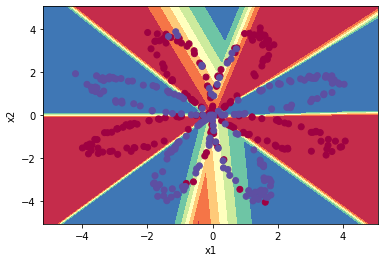

In [84]:
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x).T, X, Y)